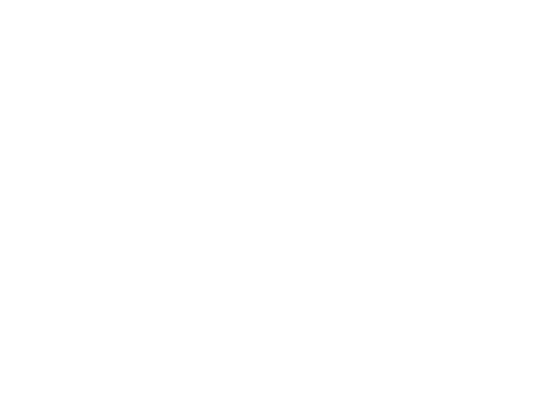

In [148]:
I = imread('stones_rgb.jpg');
I = im2double(I);
figure;
imshow(I);

In [ ]:
% define n and h
[h,~,~] = size(I);
n=h*h;

% define r and sigma
r = 2;
sig = 10;

% distance weight matrix
D_W = [0.299, 0.587, 0.114; 
         -0.14713, -0.28886, 0.436;
          0.615, -0.51499, -0.10001];

% construct W
W = zeros(n,n);
for i=1:n
    if rem(i,100) == 0
        i
    end
    % extract pixel coordinates
    x1 = rem(i,h);
    if x1 == 0
        x1 = 64;
    end
    y1 = idivide(int32(i-1), int32(h)) + 1;
    for j=1:i-1
        % extract pixel coordinates
        x2 = rem(j,h);
        if x2 == 0
            x2 = 64;
        end
        y2 = idivide(int32(j-1), int32(h)) + 1;
        
        if abs(x1-x2) > r || abs(y1-y2) > r
            continue;
        end
        
        v_i = reshape(I(x1,y1,:), [3,1]);
        v_j = reshape(I(x2,y2,:), [3,1]);
        
        % calcualte similarity
        q = D_W*(v_i-v_j);
        sim = exp(-(q'*q)/(2*sig^2));
        W(i,j) = sim;
        W(j,i) = sim;
    end
end

i =  100
i =  200
i =  300
i =  400
i =  500
i =  600
i =  700
i =  800
i =  900
i =  1000
i =  1100
i =  1200
i =  1300
i =  1400
i =  1500
i =  1600
i =  1700
i =  1800
i =  1900
i =  2000
i =  2100
i =  2200
i =  2300
i =  2400
i =  2500
i =  2600
i =  2700
i =  2800
i =  2900
i =  3000
i =  3100
i =  3200


In [133]:
% construct Laplacian matrix
D = diag(sum(W,2));
D_inv_sqrt = diag(sqrt(diag(D).^(-1)));
L = D_inv_sqrt*W*D_inv_sqrt;

In [134]:
k=5;

% finding eigenvectors by simultaneous iteration
Q = qr(randn(n,k),0);
for i=1:100
    Q = L*Q;
    [Q,~] = qr(Q,0);
end

V = D_inv_sqrt*Q;

In [147]:
V(1:10,1:5)
%v = Q(:,4);
%e = (v'*L*v)/(v'*v);
%figure;hist(V(:,1));
%v1 = V(:,1);
%ind = (v1<0);
%c1 = zeros(n,1);
%c2 = zeros(n,1);
%c1(ind) = v1(ind);
%c2(~ind) = v1(~ind);
%figure;imshow(reshape(V(:,1),[h,h]));
%figure,imshow(zeros(h,h));

ans =

  -5.8762e-02  -6.0365e-03  -1.8297e-02  -5.7479e-03  -4.4042e-03
  -5.9510e-02  -6.2420e-03  -1.9019e-02  -6.0153e-03  -4.2029e-03
  -6.0383e-02  -6.5084e-03  -1.9951e-02  -6.3844e-03  -3.7638e-03
  -6.0852e-02  -6.6594e-03  -2.0477e-02  -6.6000e-03  -3.4660e-03
  -5.9971e-02  -6.5148e-03  -1.9973e-02  -6.4909e-03  -2.9728e-03
  -5.2097e-02  -4.4655e-03  -1.2810e-02  -3.9094e-03  -4.2818e-03
  -1.0581e-03   4.7825e-04  -1.4566e-02   8.3430e-04   2.9016e-02
  -1.0917e-03   4.5733e-04  -1.4507e-02   8.3890e-04   2.8857e-02
  -1.0765e-03   4.6625e-04  -1.4534e-02   8.3661e-04   2.8927e-02
  -1.2251e-03   3.7110e-04  -1.4273e-02   8.5116e-04   2.8203e-02

